https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

# Data Exploration

In [3]:
!pip3 install hyperactive

In [42]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('/content/drive/MyDrive/ML-Project/card_transdata_big.csv', delimiter=',')
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.000000,1.000000,0.000000,0.000000,0.000000
1,10.829943,0.175592,1.294219,1.000000,0.000000,0.000000,0.000000,0.000000
2,5.091079,0.805153,0.427715,1.000000,0.000000,0.000000,1.000000,0.000000
3,2.247564,5.600044,0.362663,1.000000,1.000000,0.000000,1.000000,0.000000
4,44.190936,0.566486,2.222767,1.000000,1.000000,0.000000,1.000000,0.000000


In [6]:
#Wie viele Zeilen und Spalten hat der Datensatz?
print(df.shape)

(1000000, 8)


In [7]:
df["fraud"].value_counts(normalize=True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

In [8]:
#Welche Spalten beinhaltet der Datesantz?
print(df.columns)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [9]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [11]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
corr = df.corr()
print(corr["fraud"])

distance_from_home                0.187571
distance_from_last_transaction    0.091917
ratio_to_median_purchase_price    0.462305
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
online_order                      0.191973
fraud                             1.000000
Name: fraud, dtype: float64


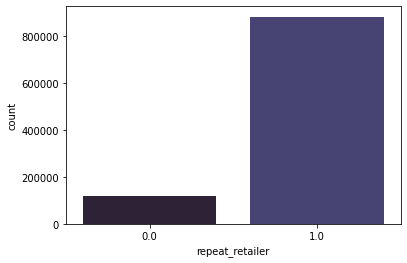

In [13]:
sns.set_palette(sns.color_palette("mako"))
sns.countplot(x="repeat_retailer", data=df)

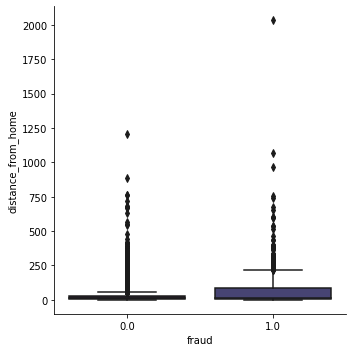

In [14]:
df2 = df.head(10000)
sns.catplot(x="fraud", y="distance_from_home", kind="box", data=df2)

**Feature Analysis**

In [15]:
y=df.fraud 
X=df.drop('fraud',axis=1)

In [14]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

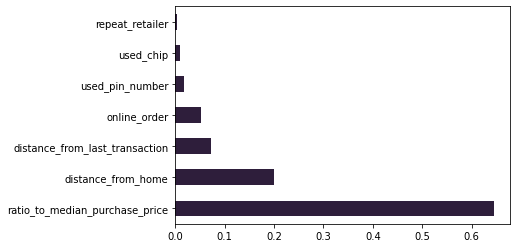

In [15]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Outlier detection**

In [44]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import matplotlib.dates as md
from scipy.stats import norm
%matplotlib inline 
import seaborn as sns 
sns.set_style("whitegrid") #possible choices: white, dark, whitegrid, darkgrid, ticks

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.set_option('float_format', '{:f}'.format)
pd.set_option('max_columns',250)
pd.set_option('max_rows',150)

In [45]:
x1='distance_from_home';x2='distance_from_last_transaction'
X = df[[x1,x2]]

In [46]:
clf = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.02)
preds = clf.fit_predict(X)
df['isoletionForest_outliers'] = preds
df['isoletionForest_outliers'] = df['isoletionForest_outliers'].astype(str)
df['isoletionForest_scores'] = clf.decision_function(X)
print(df['isoletionForest_outliers'].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



1     980000
-1     20000
Name: isoletionForest_outliers, dtype: int64


In [39]:
fig = px.scatter(df, x=x1, y=x2, color='isoletionForest_outliers')
fig.update_layout(title='Isolation Forest Outlier Detection', title_x=0.5, yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()

In [41]:
fig = px.scatter(df, x=x1, y=x2, color="isoletionForest_scores")
fig.update_layout(title='Isolation Forest Outlier Detection (scores)', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()

In [47]:
data = df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



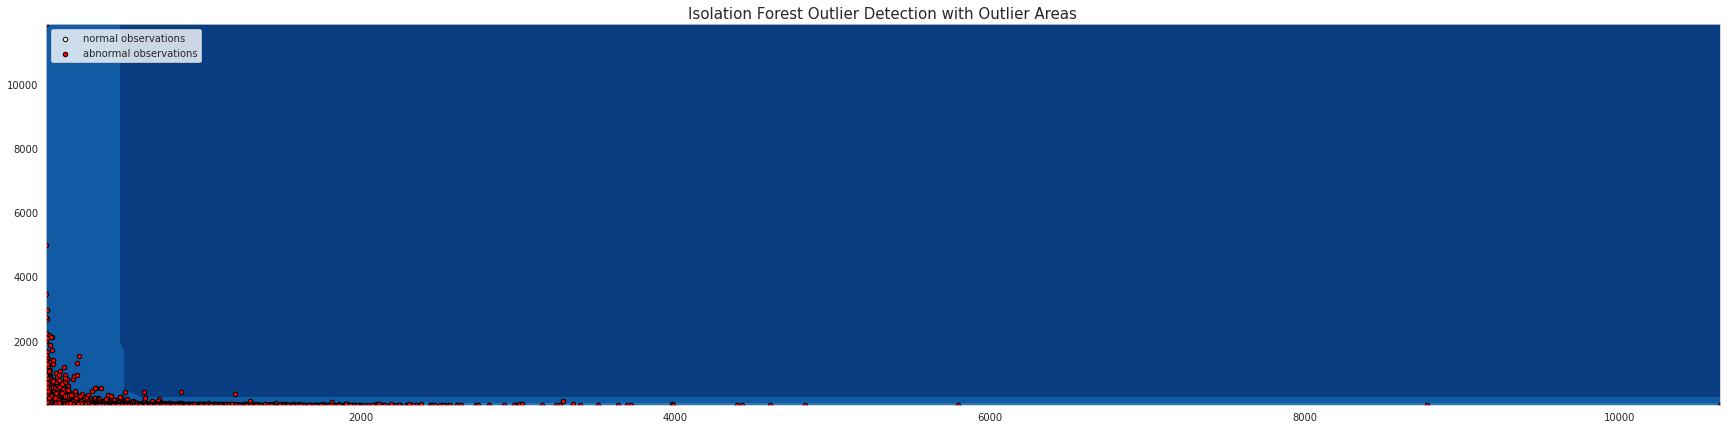

In [48]:
X_inliers = data.loc[data['isoletionForest_outliers']=='1'][[x1,x2]]
X_outliers = data.loc[data['isoletionForest_outliers']=='-1'][[x1,x2]]

xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50), np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(30, 7))
plt.title("Isolation Forest Outlier Detection with Outlier Areas", fontsize = 15, loc='center')
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

inl = plt.scatter(X_inliers.iloc[:, 0], X_inliers.iloc[:, 1], c='white', s=20, edgecolor='k')
outl = plt.scatter(X_outliers.iloc[:, 0], X_outliers.iloc[:, 1], c='red',s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((X.iloc[:, 0].min(), X.iloc[:, 0].max()))
plt.ylim((X.iloc[:, 1].min(), X.iloc[:, 1].max()))
plt.legend([inl, outl],["normal observations", "abnormal observations"],loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



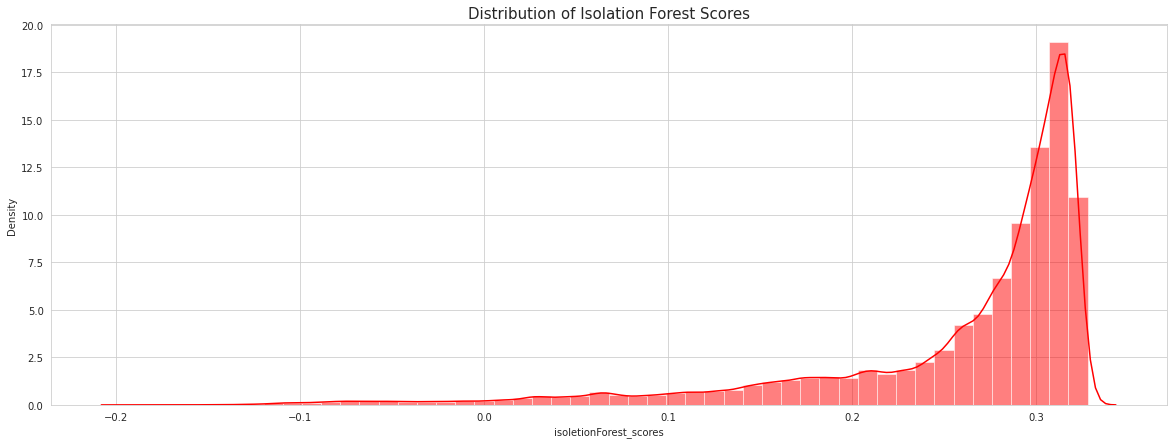

In [49]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Distribution of Isolation Forest Scores', fontsize = 15, loc='center')
sns.distplot(data['isoletionForest_scores'],color='red',label='if',hist_kws = {"alpha": 0.5});

## Under-Sampling

In [16]:
fraud_count_0, fraud_count_1 = df['fraud'].value_counts()

fraud_0 = df[df['fraud'] == 0]
fraud_1 = df[df['fraud'] == 1]# print the shape of the class
fraud_1.shape

(87403, 8)

total class of 1 and0: 0.0    87403
1.0    87403
Name: fraud, dtype: int64


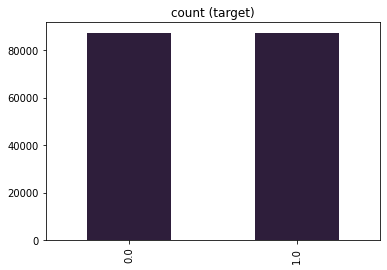

In [17]:
fraud_0_under = fraud_0.sample(fraud_count_1)

fraud_under = pd.concat([fraud_0_under, fraud_1], axis=0)

print("total class of 1 and0:",fraud_under['fraud'].value_counts())# plot the count after under-sampeling
fraud_under['fraud'].value_counts().plot(kind='bar', title='count (target)')

In [18]:
fraud_under.shape

(174806, 8)

In [19]:
y=fraud_under.fraud 
X=fraud_under.drop('fraud',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# make prediction 
preds = mlp.predict(X_test) 
# check performance
print("Accuracy", accuracy_score(preds,y_test))
print("Precision", precision_score(preds,y_test))
print("Recall", recall_score(preds,y_test))
print("F1", f1_score(preds,y_test))

Accuracy 0.9957954350437618
Precision 0.9990279048490394
Recall 0.9926140560195443
F1 0.9958106529111688


## Over-Sampling

In [21]:
y=df.fraud 
X=df.drop('fraud',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_os = pd.concat([X_train, y_train], axis=1)

In [22]:
fraud_count_0, fraud_count_1 = df_os['fraud'].value_counts()

fraud_0 = df_os[df_os['fraud'] == 0]
fraud_1 = df_os[df_os['fraud'] == 1]# print the shape of the class
fraud_1.shape

(69960, 8)

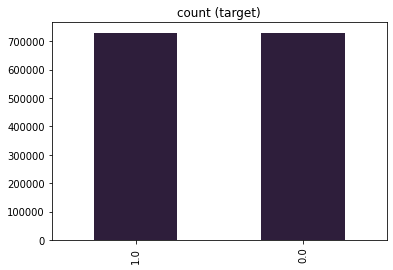

In [23]:
fraud_over = fraud_1.sample(fraud_count_0, replace=True)
fraud_over = pd.concat([fraud_over, fraud_0], axis=0)
fraud_over['fraud'].value_counts().plot(kind='bar', title='count (target)')

In [24]:
X_train = fraud_over.drop(['fraud'], axis=1)
y_train = fraud_over.fraud

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [27]:
# make prediction 
preds = mlp.predict(X_test) 
# check performance
print("Accuracy", accuracy_score(preds,y_test))
print("Precision", precision_score(preds,y_test))
print("Recall", recall_score(preds,y_test))
print("F1", f1_score(preds,y_test))

Accuracy 0.99577
Precision 0.9990253970073956
Recall 0.9545877841687209
F1 0.976301193344165


In [2]:
X_train.shape

NameError: ignored

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
from hyperactive.optimizers import ParticleSwarmOptimizer
from hyperactive import Hyperactive

def model(opt):
    mlp = MLPClassifier(activation=opt["activation"], 
                        solver=opt["solver"], 
                        alpha=opt["alpha"], 
                        learning_rate=opt["learning_rate"])
    scores = cross_val_score(mlp, X_train, y_train, cv=5)
    score = scores.mean()

    return score


search_space = {
    "activation" : ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': list(np.arange(0, 2, 0.001)),
    'learning_rate': ['constant','adaptive']

}


optimizer = ParticleSwarmOptimizer(
    inertia=0.4,
    cognitive_weight=0.7,
    social_weight=0.7,
    temp_weight=0.3,
    rand_rest_p=0.05,
)

hyper = Hyperactive()
hyper.add_search(model, search_space, optimizer=optimizer, n_iter=30)
hyper.run()

model:   3%|▎         | 1/30 [07:46<3:45:20, 466.22s/it, best_iter=0, best_pos=[   0    1 1597    1], best_score=0.9676353858754867]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

BrokenPipeError: ignored

# Model Training

To-Do: Basismodelle analysieren

# Evaluation

In [ ]:
# make prediction 
preds = mlp.predict(X_test) 
# check performance
print("Accuracy", accuracy_score(preds,y_test))
print("Precision", precision_score(preds,y_test))
print("Recall", recall_score(preds,y_test))
print("F1", f1_score(preds,y_test))

Accuracy 0.9933070190492534
Precision 0.991251143641354
Recall 0.9953491042719339
F1 0.993295897318359


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[17450,    24],
       [    0, 17488]])

In [22]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)

LocalOutlierFactor(novelty=True)

# Notizen

Trennschärfemaß mit anderen Arbeiten von Kaggle vergleichen und sagen was erwartet werden kann